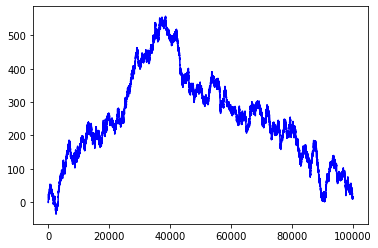

In [6]:
from random import choice
from pylab import *

N = 100000

x = zeros([N])
t = range(N)

for i in range(1,N):
    if choice(['forward','back']) == 'back':
        x[i] = x[i-1] - 1
    else:
        x[i] = x[i-1] + 1
RMS = array([sqrt(i*i) for i in x])

plot(t,x,"b-")
#plot(t,RMS,'g-')
show()

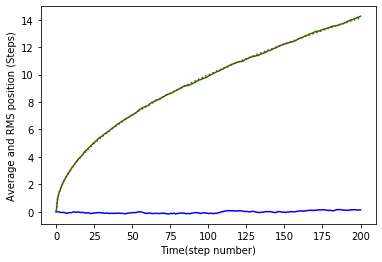

In [27]:
from random import choice
from pylab import *
from scipy.optimize import curve_fit

def power(x,a,b):
    return a*x**b

steps = 200
boys = 2000

x = zeros([steps])
t = linspace(0,steps,200)
x_sum = zeros([steps])
x2_sum = zeros([steps])

for j in range(boys):
    for i in range(1,steps):
        if choice([0,1]):
            x[i] = x[i-1] - 1
        else:
            x[i] = x[i-1] + 1
    for i in range(steps):
        x_sum[i] = x_sum[i] + x[i]
        x2_sum[i] = x2_sum[i] + x[i]**2
x_avg = [float(i)/float(boys) for i in x_sum]
RMS = [sqrt(float(i)/float(boys)) for i in x2_sum]

xlabel("Time(step number)")
ylabel("Average and RMS position (Steps)")
plot(t,x_avg,"b-")
plot(t,RMS,"g-")
popt, pcov = curve_fit(power, t, RMS)
plot(t,power(t,popt[0],popt[1]),"r:")

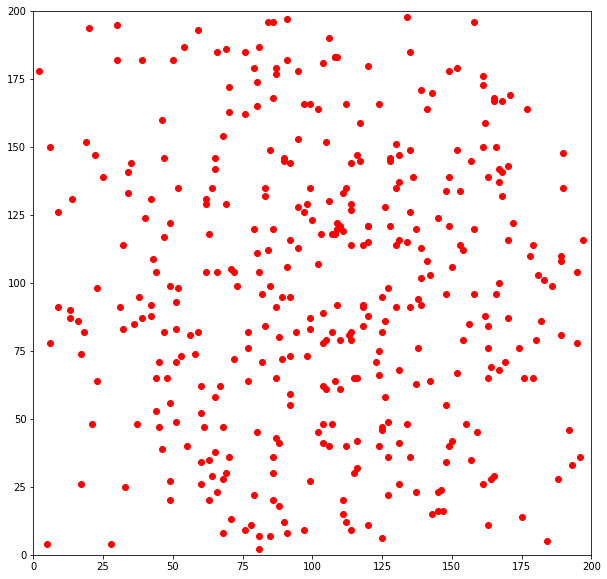

In [43]:
import sys
from pylab import *
from random import randint

ion()
figure(figsize = (10,10))

atoms = ones([400,2])*100

line, = plot(atoms[:,0],atoms[:,1],"ro")
xlim(0,200)
ylim(0,200)
draw()
#wait = float(input("Press return to continue"))

N = 5000#int(sys.argv[1])

for i in range(N):
    for j in range(400):
        atoms[j,0] += randint(-1,1)
        atoms[j,1] += randint(-1,1)
        x,y = (atoms[j,0],atoms[j,1])
        if x == 200:
            atoms[j,0] = 198
        elif x==0 :
            atoms[j,0] ==0
        if y==200:
            atoms[j,1] = 198
        elif y==0:
            atoms[j,1] = 2
    line.set_xdata(atoms[:,0])
    line.set_ydata(atoms[:,1])
    draw()
#wait = input("press return to exit")